## 202055364 황성윤

# 빅데이터분석 특강 중간고사

In [4]:
import numpy as np
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 
tnp.experimental_enable_numpy_behavior()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 

## `1`. 경사하강법과 tf.GradientTape()의 사용방법 (30점)

`(1)` 아래는 $X_i \overset{iid}{\sim} N(3,2^2)$ 를 생성하는 코드이다. 

In [209]:
tf.random.set_seed(43052)
x= tnp.random.randn(10000)*2+3
x

<tf.Tensor: shape=(10000,), dtype=float64, numpy=
array([ 4.12539849,  5.46696729,  5.27243374, ...,  2.89712332,
        5.01072291, -1.13050477])>

함수 $L(\mu,\sigma)$을 최대화하는 $(\mu,\sigma)$를 `tf.GradientTape()`를 활용하여 추정하라. (경사하강법 혹은 경사상승법을 사용하고 $\mu$의 초기값은 2로 $\sigma$의 초기값은 3으로 설정할 것) 

$$L(\mu,\sigma)=\prod_{i=1}^{n}f(x_i), \quad f(x_i)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{x_i-\mu}{\sigma})^2}$$

In [210]:
tnp.mean(x), tnp.sqrt(tnp.var(x)*(9999/10000)) # MLE of mu and sigma

(<tf.Tensor: shape=(), dtype=float64, numpy=3.0164017983287295>,
 <tf.Tensor: shape=(), dtype=float64, numpy=1.9869589700290096>)

In [211]:
mu = tf.Variable(2.0) 
sigma = tf.Variable(3.0)

In [212]:
alpha = 0.0001
opt = tf.keras.optimizers.SGD(alpha)

In [213]:
for epoc in range(10000):
    with tf.GradientTape() as tape:
        # minimize minus log likelihood function
        minus_logL = -tf.reduce_sum(tnp.log((1/tnp.sqrt(2*np.pi)/sigma)*tnp.exp(-(1/2)*((x-mu)/sigma)**2))) 
    slope0,slope1 = tape.gradient(minus_logL,[mu,sigma])
    opt.apply_gradients([(slope0,mu),(slope1,sigma)])

In [214]:
mu, sigma

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0164015>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9870584>)

$\hat{\mu}=3.0164015, \hat{\sigma}=1.9870584$

`(2)` 아래는 $X_i \overset{iid}{\sim} Ber(0.8)$을 생성하는 코드이다. 

In [215]:
tf.random.set_seed(43052)
x= tf.constant(np.random.binomial(1,0.8,(10000,)))
x

<tf.Tensor: shape=(10000,), dtype=int32, numpy=array([0, 1, 1, ..., 1, 0, 1])>

함수 $L(p)$을 최대화하는 $p$를 `tf.GradientTape()`를 활용하여 추정하라. (경사하강법 혹은 경사상승법을 사용하고 $p$의 초기값은 0.3으로 설정할 것) 


$$L(p)=\prod_{i=1}^{n}f(x_i), \quad f(x_i)=p^{x_i}(1-p)^{1-x_i}$$

In [216]:
tnp.mean(x) # MLE of mu and sigma

<tf.Tensor: shape=(), dtype=float64, numpy=0.8005>

In [217]:
p = tf.Variable(0.3)

In [218]:
alpha = 0.000001
opt = tf.keras.optimizers.SGD(alpha)

In [219]:
for epoc in range(10000):
    with tf.GradientTape() as tape:
        # minimize minus log likelihood function
        minus_logL = -tf.reduce_sum(x*tnp.log(p)+(1-x)*tnp.log(1-p)) 
    slope = tape.gradient(minus_logL,p)
    opt.apply_gradients([(slope,p)])

In [220]:
p

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.80049956>

$\hat{p}=0.80049956$

`(3)` 아래의 모형에 따라서 $\{Y_i\}_{i=1}^{10000}$를 생성하는 코드를 작성하라. 
- $Y_i \overset{iid}{\sim} N(\mu_i,1)$ 
- $\mu_i = \beta_0 + \beta_1 x_i = 0.5 + 2 x_i$ , where $x_i = \frac{i}{10000}$

함수 $L(\beta_0,\beta_1)$을 최대화하는 $(\beta_0,\beta_1)$를 `tf.GradientTape()`를 활용하여 추정하라. (경사하강법 혹은 경사상승법을 사용하고 $\beta_0,\beta_1$의 초기값은 모두 1로 설정할 것) 

$$L(\beta_0,\beta_1)=\prod_{i=1}^{n}f(y_i), \quad f(y_i)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(y_i-\mu_i)^2}, \quad \mu_i=\beta_0+\beta_1 x_i$$

In [221]:
tf.random.set_seed(55364)
x = (tnp.array(range(10000))+1)/10000
mu = 0.5+2.0*x
y = tf.constant(1*tnp.random.randn(1)+mu,dtype=tf.float64)
n = 10000

In [222]:
x

<tf.Tensor: shape=(10000,), dtype=float64, numpy=
array([1.000e-04, 2.000e-04, 3.000e-04, ..., 9.998e-01, 9.999e-01,
       1.000e+00])>

In [223]:
y

<tf.Tensor: shape=(10000,), dtype=float64, numpy=
array([2.03309095, 2.03329095, 2.03349095, ..., 4.03249095, 4.03269095,
       4.03289095])>

In [224]:
Sxx = sum((x-x.mean())**2)
Sxy = sum((x-x.mean())*(y-y.mean()))
beta1_hat = Sxy/Sxx 
beta0_hat = y.mean() - x.mean()*beta1_hat
beta0_hat, beta1_hat # MLE of β0 and β1

(<tf.Tensor: shape=(), dtype=float64, numpy=2.0328909487904694>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2.0>)

In [225]:
beta0 = tf.Variable(1.0)
beta1 = tf.Variable(1.0)

In [226]:
alpha = 0.0001
opt = tf.keras.optimizers.SGD(alpha)

In [227]:
for epoc in range(10000):
    with tf.GradientTape() as tape:
        # minimize minus log likelihood function
        minus_logL = tf.reduce_sum((1/2)*tnp.log(2*np.pi)+(1/2)*(y-beta0-beta1*x)**2)   
    slope0,slope1 = tape.gradient(minus_logL,[beta0,beta1])
    opt.apply_gradients([(slope0,beta0),(slope1,beta1)])

In [228]:
beta0, beta1

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0328915>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.999999>)

$\hat{\beta_{0}}=2.0328915, \hat{\beta_{1}}=1.999999$

## `2`. 회귀분석의 이론적해와 tf.keras.optimizer 이용방법 (20점)

아래와 같은 선형모형을 고려하자. 

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i.$$

이때 오차항은 정규분포로 가정한다. 즉 $\epsilon_i \overset{iid}{\sim} N(0,\sigma^2)$라고 가정한다. 

관측데이터가 아래와 같을때 아래의 물음에 답하라. 

In [229]:
x= tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4])
y= tnp.array([55.4183651 , 58.19427589, 61.23082496, 62.31255873, 63.1070028 , 
              63.69569103, 67.24704918, 71.43650092, 73.10130336, 77.84988286])
# X= tnp.array([[1.0, 20.1], [1.0, 22.2], [1.0, 22.7], [1.0, 23.3], [1.0, 24.4],
#               [1.0, 25.1], [1.0, 26.2], [1.0, 27.3], [1.0, 28.4], [1.0, 30.4]])

`(1)` MSE loss를 최소화 하는 $\beta_0,\beta_1$의 해석해를 구하라. 

In [230]:
X = tf.stack([tf.ones(10,dtype='float64'),x],axis=1)
y = y.reshape(10,1)
y.shape,X.shape

(TensorShape([10, 1]), TensorShape([10, 2]))

In [231]:
tf.linalg.inv(X.T@X)@X.T@y 

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[9.94457323],
       [2.21570461]])>

$\hat{\beta_{0}}=9.94457323, \hat{\beta_{1}}=2.21570461$

`(2)` 경사하강법과 MSE loss의 도함수를 이용하여 $\beta_0,\beta_1$을 추정하라. 

**주의** tf.GradeintTape()를 이용하지 말고 MSE loss의 해석적 도함수를 사용할 것.

In [232]:
beta_hat = tf.Variable(tnp.array([10.0,5.0]).reshape(2,1))
alpha=0.0001

In [233]:
for epoc in range(1000):
    slope = -2*X.T@(y-X@beta_hat)
    beta_hat.assign_sub(alpha*slope)

In [234]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[9.89177719],
       [2.21778641]])>

$\hat{\beta_{0}}=9.89177719, \hat{\beta_{1}}=2.21778641$

`(3)` `tf.keras.optimizers`의 `apply_gradients()`를 이용하여 $\beta_0,\beta_1$을 추정하라. 

In [235]:
N = 10
beta_hat = tf.Variable(tnp.array([10.0,5.0]).reshape(2,1))
alpha=0.0001
opt = tf.keras.optimizers.SGD(alpha)

In [236]:
for epoc in range(1000):
    with tf.GradientTape(persistent=True) as tape: 
        tape.watch(beta_hat)
        yhat= X@beta_hat
        loss= (y-yhat).T @ (y-yhat) / N
    slope = tape.gradient(loss,beta_hat)
    opt.apply_gradients([(slope,beta_hat)])

In [237]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[9.89044651],
       [2.21783888]])>

$\hat{\beta_{0}}=9.89044651, \hat{\beta_{1}}=2.21783888$

`(4)` `tf.keras.optimizers`의 `minimize()`를 이용하여 $\beta_0,\beta_1$을 추정하라. 

In [238]:
N = 10
beta_hat = tf.Variable(tnp.array([10.0,5.0]).reshape(2,1))
loss_fn = lambda: (y-X@beta_hat).T @ (y-X@beta_hat) / N 
alpha=0.0001 
opt = tf.keras.optimizers.SGD(alpha)

In [239]:
for epoc in range(1000): 
    opt.minimize(loss_fn,beta_hat)

In [240]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[9.89044651],
       [2.21783888]])>

$\hat{\beta_{0}}=9.89044651, \hat{\beta_{1}}=2.21783888$

## `3`. keras를 이용한 풀이 (30점)

`(1)` 아래와 같은 모형을 고려하자. 

$$y_i= \beta_0 + \sum_{k=1}^{5} \beta_k \cos(k t_i)+\epsilon_i, \quad i=0,1,\dots, 999$$

여기에서 $t_i=\frac{2\pi i}{1000}$ 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,\sigma^2)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 위의 모형에서 아래와 같은 데이터를 관측했다고 가정하자. 

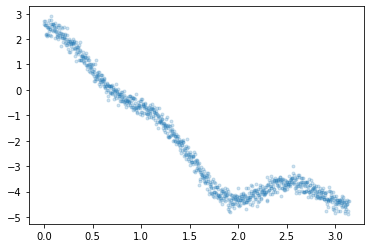

In [241]:
np.random.seed(43052)
t= np.array(range(1000))* np.pi/1000
y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2
plt.plot(t,y,'.',alpha=0.2)

tf.keras를 이용하여 $\beta_0,\dots,\beta_5$를 추정하라. ($\beta_0,\dots,\beta_5$의 참값은 각각 -2,3,1,0,0,0.5 이다) 

In [242]:
y = tnp.array(y.reshape(1000,1))
X = tf.stack([tf.ones(1000,dtype='float64'),tnp.array(np.cos(t)),tnp.array(np.cos(2*t)),tnp.array(np.cos(3*t)),
              tnp.array(np.cos(4*t)),tnp.array(np.cos(5*t))],axis=1)
y.shape, X.shape

(TensorShape([1000, 1]), TensorShape([1000, 6]))

In [243]:
tf.random.set_seed(55364) 
## 1단계
net1 = tf.keras.Sequential() 
## 2단계
net1.add(tf.keras.layers.Dense(100,activation='relu')) 
net1.add(tf.keras.layers.Dense(1))
## 3단계 
net1.compile(optimizer=tf.optimizers.SGD(0.01),loss='mse')
## 4단계 
net1.fit(X,y,epochs=1000,verbose=0,batch_size=1000)

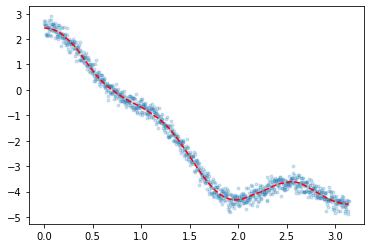

In [244]:
plt.plot(t,y,'.',alpha=0.2)
plt.plot(t,net1(X),'--r')

In [245]:
N = 1000
beta_hat = tf.Variable(tnp.array([0.0,4.0,2.0,1.0,1.0,0.0]).reshape(6,1))
alpha=0.01
opt = tf.keras.optimizers.SGD(alpha)
for epoc in range(1000):
    with tf.GradientTape() as tape: 
        yhat= X@beta_hat
        loss= (y-yhat).T @ (y-yhat) / N
    slope = tape.gradient(loss,beta_hat)
    opt.apply_gradients([(slope,beta_hat)])

In [246]:
beta_hat

<tf.Variable 'Variable:0' shape=(6, 1) dtype=float64, numpy=
array([[-2.01226553e+00],
       [ 3.00103784e+00],
       [ 1.00674977e+00],
       [ 1.88070818e-03],
       [-3.84802712e-03],
       [ 4.97089344e-01]])>

$\hat{\beta_{0}}=-2.01226553, \hat{\beta_{1}}=3.00103784, \hat{\beta_{2}}=1.00674977, \hat{\beta_{3}}=0.00188070818, \hat{\beta_{4}}=-0.00384802712, \hat{\beta_{5}}=0.497089344$   

`(2)` 아래와 같은 모형을 고려하자. 

$$y_i \sim Ber(\pi_i), ~ \text{where} ~ \pi_i=\frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$$


위의 모형에서 관측한 데이터는 아래와 같다. 

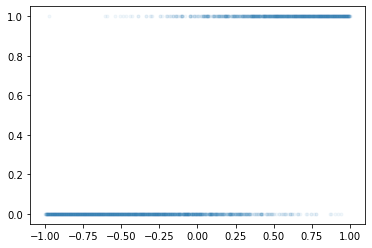

In [247]:
tf.random.set_seed(43052)
x = tnp.linspace(-1,1,2000) 
y = tf.constant(np.random.binomial(1, tf.nn.sigmoid(-1+5*x)),dtype=tf.float64) 
plt.plot(x,y,'.',alpha=0.05)

tf.keras를 이용하여 $w_0,w_1$을 추정하라. (참고: $w_0, w_1$에 대한 참값은 -1과 5이다.) 

In [248]:
N = 2000
x = x.reshape(2000,1)
y = y.reshape(2000,1)
y.shape, x.shape

(TensorShape([2000, 1]), TensorShape([2000, 1]))

In [249]:
tf.random.set_seed(55364)
net2 = tf.keras.Sequential() 
net2.add(tf.keras.layers.Dense(1,activation='sigmoid'))
bceloss_fn = lambda y,yhat: -tf.reduce_mean(y*tnp.log(yhat) + (1-y)*tnp.log(1-yhat))
net2.compile(loss=bceloss_fn, optimizer=tf.keras.optimizers.SGD(0.1))
net2.fit(x,y,epochs=1000,verbose=0,batch_size=N) 

In [250]:
net2.weights

[<tf.Variable 'dense_17/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[4.2755685]], dtype=float32)>,
 <tf.Variable 'dense_17/bias:0' shape=(1,) dtype=float32, numpy=array([-0.9174792], dtype=float32)>]

$\hat{w_{0}}=-0.9174792, \hat{w_{1}}=4.2755685$

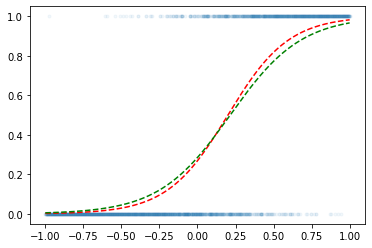

In [251]:
v = tf.nn.sigmoid(-1+5*x)
plt.plot(x,y,'.',alpha=0.05)
plt.plot(x,v,'--r')
plt.plot(x,net2(x),'--g')

## `4`. Piecewise-linear regression (15점) 

아래의 모형을 고려하자. 

model: $y_i=\begin{cases} x_i +0.3\epsilon_i & x\leq 0 \\ 3.5x_i +0.3\epsilon_i & x>0 \end{cases}$ 

아래는 위의 모형에서 생성한 샘플이다. 

In [252]:
## data 
np.random.seed(43052)
N=100
x= np.linspace(-1,1,N).reshape(N,1)
y= np.array(list(map(lambda x: x*1+np.random.normal()*0.3 if x<0 else x*3.5+np.random.normal()*0.3,x))).reshape(N,1)

`(1)` 다음은 $(x_i,y_i)$를 아래와 같은 아키텍처로 적합시키는 코드이다. 

- $\hat{y} =  \hat{\beta}_0+\hat{\beta}_1x $

In [253]:
tf.random.set_seed(43054) 
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1)) 
net.compile(optimizer=tf.optimizers.SGD(0.1),loss='mse')
net.fit(x,y,batch_size=N,epochs=1000,verbose=0) # numpy로 해도 돌아감

케라스에 의해 추정된 $\hat{\beta}_0,\hat{\beta}_1$을 구하라. 

In [254]:
net.weights

[<tf.Variable 'dense_18/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[2.2616348]], dtype=float32)>,
 <tf.Variable 'dense_18/bias:0' shape=(1,) dtype=float32, numpy=array([0.6069048], dtype=float32)>]

$\hat{\beta}_0=0.6069048,\hat{\beta}_1=2.2616348$

`(2)` 다음은 $(x_i,y_i)$를 아래와 같은 아키텍처로 적합시키는 코드이다. 

- $\boldsymbol{u}= x\boldsymbol{W}^{(1)}+\boldsymbol{b}^{(1)}$
- $\boldsymbol{v}= \text{relu}(u)$ 
- $y= \boldsymbol{v}\boldsymbol{W}^{(2)}+b^{(2)}$

In [255]:
tf.random.set_seed(43056) 
## 1단계
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(2))
net.add(tf.keras.layers.Activation('relu')) 
net.add(tf.keras.layers.Dense(1))
net.compile(optimizer=tf.optimizers.SGD(0.1),loss='mse')
net.fit(x,y,epochs=1000,verbose=0,batch_size=N)

${\boldsymbol u}$를 이용하여 ${\boldsymbol v}$를 만드는 코드와 ${\boldsymbol v}$를 이용하여 $y$를 만드는 코드를 작성하라. 

In [256]:
l1,a1,l2 = net.layers

In [257]:
u = l1(x)
v = a1(u)
yhat = l2(v)

In [258]:
net.weights

[<tf.Variable 'dense_19/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[1.9178677 , 0.72507745]], dtype=float32)>,
 <tf.Variable 'dense_19/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.33402318, -0.7268469 ], dtype=float32)>,
 <tf.Variable 'dense_20/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 1.8141522],
        [-0.6783507]], dtype=float32)>,
 <tf.Variable 'dense_20/bias:0' shape=(1,) dtype=float32, numpy=array([-0.60076195], dtype=float32)>]

In [259]:
W1= tf.Variable(tnp.array([[1.9178677 , 0.72507745]]))
b1= tf.Variable(tnp.array([0.33402318, -0.7268469]))
W2= tf.Variable(tnp.array([[1.8141522],[-0.6783507]]))
b2= tf.Variable(tnp.array([-0.60076195])) 

In [260]:
with tf.GradientTape() as tape: 
    u = tf.constant(x)@W1+b1 
    v = tf.nn.relu(u) 
    yhat = v@W2 + b2 
    loss = tf.losses.mse(y,yhat) 

In [261]:
tape.gradient(loss,[W1,b1,W2,b2])

[<tf.Tensor: shape=(1, 2), dtype=float64, numpy=array([[-5.41232427e-05,  0.00000000e+00]])>,
 <tf.Tensor: shape=(2,), dtype=float64, numpy=array([-1.66788716e-06,  0.00000000e+00])>,
 <tf.Tensor: shape=(2, 1), dtype=float64, numpy=
 array([[-5.75245737e-05],
        [ 0.00000000e+00]])>,
 <tf.Tensor: shape=(1,), dtype=float64, numpy=array([-2.69155698e-05])>]

`(3)` 아래는 `(1)-(2)`번 모형에 대한 discussion이다. 올바른 것을 모두 골라라. 

**(곤이)** (2) 모형은 활성화함수로 relu를 사용하였다. -> TRUE 

**(철용)** (1) 모형에서 추정해야할 파라메터의 수는 2개이다. -> TRUE 

**(아귀)** (2) 모형이 (1) 모형보다 복잡한 모형이다. -> TRUE 

**(짝귀)** (1) 의 모형은 오버피팅의 위험이 있다. -> FALSE 

## `5`. 다음을 잘 읽고 참과 거짓을 판단하라. (5점)

`(1)` 적절한 학습률이 선택된다면, 경사하강법은 손실함수가 convex일때 언제 전역최소해를 찾을 수 있다. -> TRUE

`(2)` `tf.GradientTape()`는 경사하강법을 이용하여 최적점을 찾아주는 tool이다. -> TRUE 

`(3)` 학습률이 크다는 것은 파라메터는 1회 업데이트 하는 양이 크다는 것을 의미한다. -> TRUE 

`(4)` 학습률이 크면 학습파라메터의 수렴속도가 빨라지지만 때때로 과적합에 빠질 수도 있다. -> TRUE 

`(5)` 단순회귀분석에서 MSE loss를 최소화 하는 해는 경사하강법을 이용하지 않아도 해석적으로 구할 수 있다. -> TRUE 